In [1]:
import numpy as np
import pandas as pd
import h5py, os, gc

from keras.models import  load_model
import matplotlib.pyplot as plt

import tensorflow as tf
import keras.backend as K
from cnn_utils import *

Using TensorFlow backend.


In [2]:
# TensorFlow wizardry
config = tf.ConfigProto() 
# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True 
# Only allow a total of half the GPU memory to be allocated
#config.gpu_options.per_process_gpu_memory_fraction = 0.5 
# Create a session with the above options specified.
K.tensorflow_backend.set_session(tf.Session(config=config))

tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
model = load_model('networks/conv4_3d_res_v1_e150.h5') 


* True-yes = signal identified as signal
* False-yes = background identified as signal
* True-no = background identified as background
* False-no = signal identified as background


### C60keV Test

In [4]:
X_test, y_test, shuf_ind = load_data(sig_n='C60keV',training=False, images=True, feat_study=True)
ft_test, y_ft_test, shuf_ind_ft = load_data(sig_n='C60keV',training=False, images=False, feat_study=True, shuf_ind=shuf_ind)

X_test shape:	(37999, 32, 32, 8, 1)
y_test shape:	(37999,)
X_test shape:	(37999, 72)
y_test shape:	(37999,)


In [5]:
preds = model.predict(X_test,batch_size=128, verbose=1)
# 1st column = output, 2nd column = index
pos, neg = pos_neg(y_test, preds)

pos_yes = pos[pos[:,0]>0.999]
pos_no = pos[pos[:,0]<0.01]
print('certain_true_sig:\t', pos_yes.shape[0])
print('certain_false_bckg:\t', pos_no.shape[0])
neg_yes = neg[neg[:,0]>0.99]
neg_no = neg[neg[:,0]<0.001]
print('certain_false_sig:\t', neg_yes.shape[0])
print('certain_true_bckg:\t', neg_no.shape[0])

37999/37999 [==============================] - 55s    
certain_true_sig:	 16977
certain_false_bckg:	 2
certain_false_sig:	 120
certain_true_bckg:	 13434


In [6]:
X_pos_yes = X_test[np.array(pos_yes[:,1], dtype=np.int)]
X_neg_yes = X_test[np.array(neg_yes[:,1], dtype=np.int)]
X_neg_no = X_test[np.array(neg_no[:,1], dtype=np.int)]

### Some images where network is certain

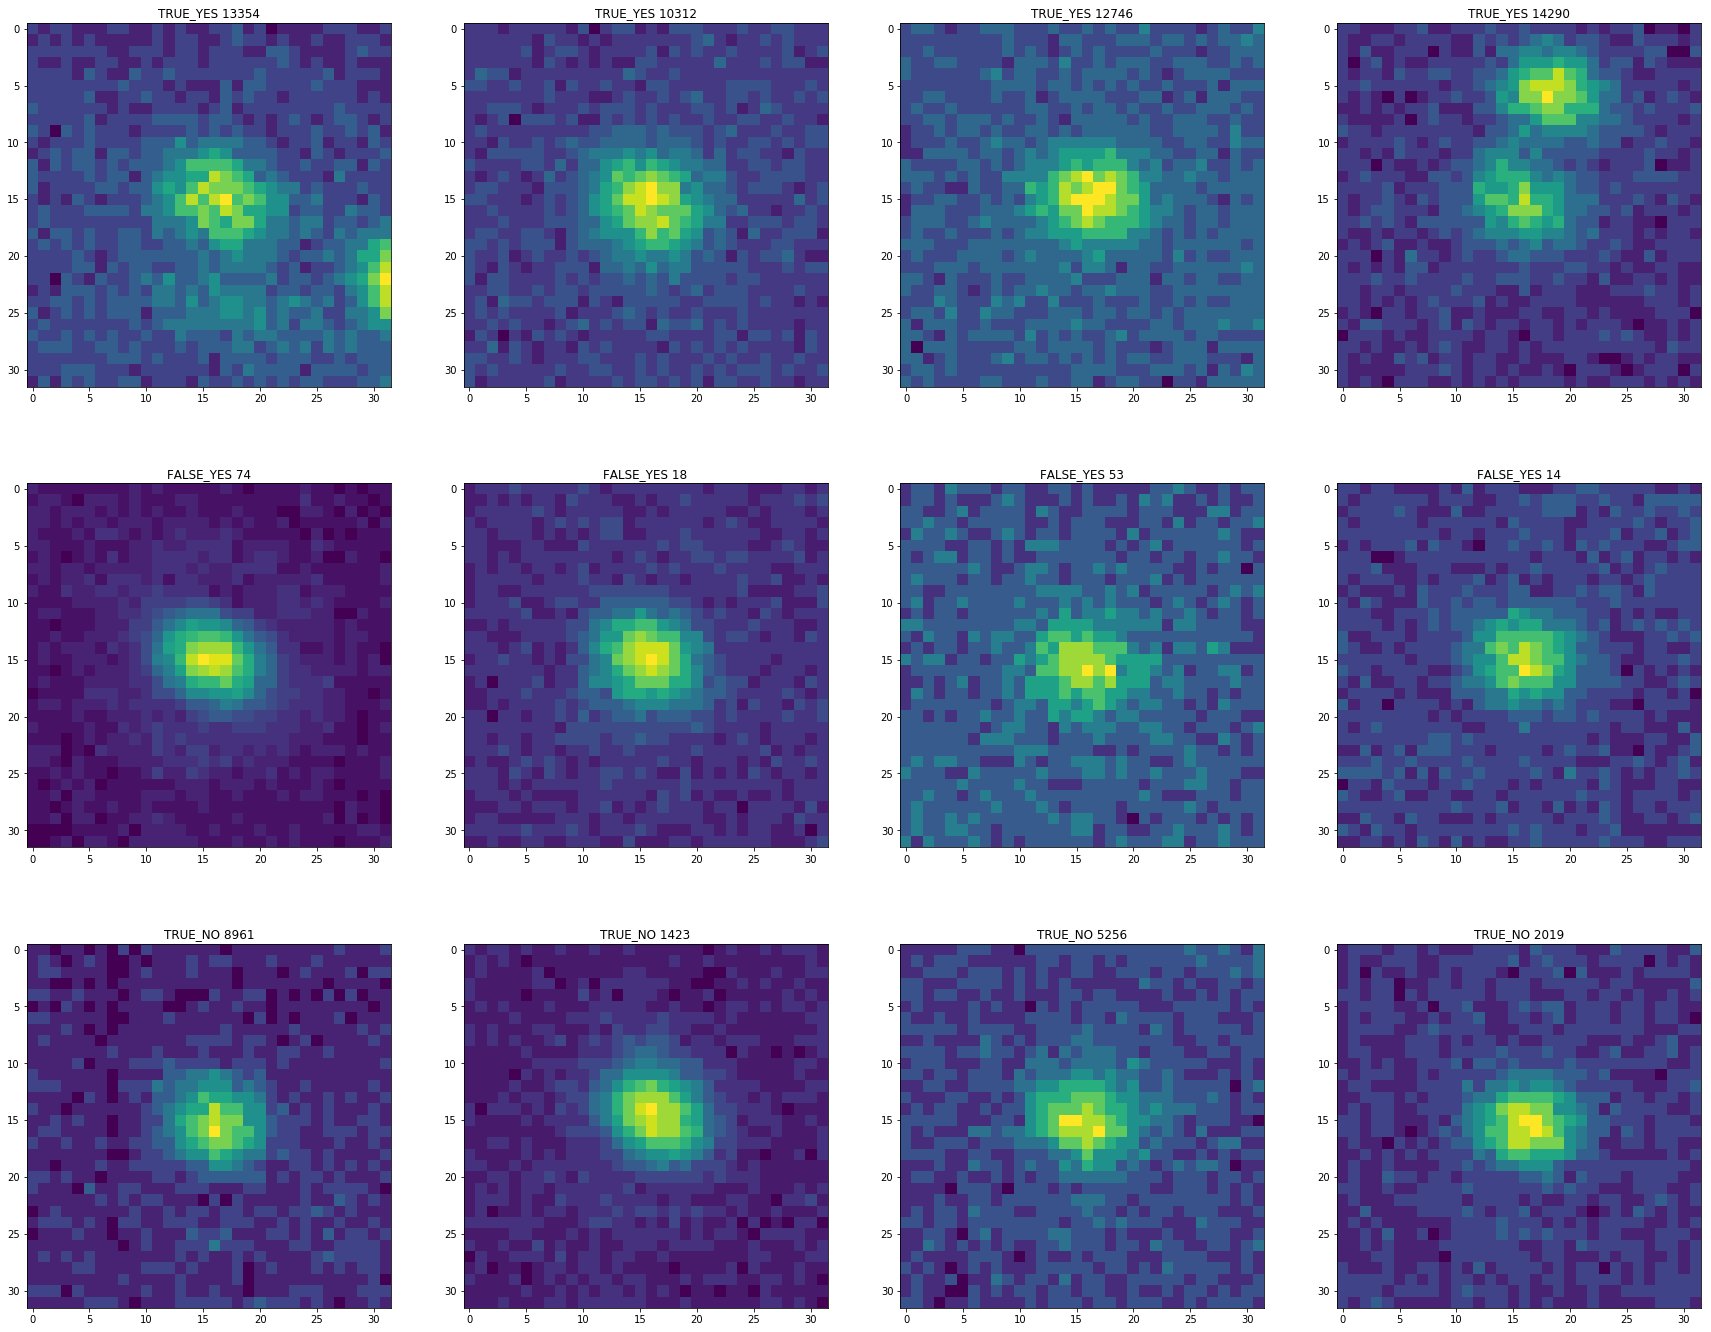

In [14]:
fig, axes = plt.subplots(3, 4,figsize=(30, 24))

for ind, ax in zip(np.random.randint(0,X_pos_yes.shape[0],4), axes.ravel()[:4]):
    ax.imshow(X_pos_yes[ind,...,3,0])
    ax.set_title('TRUE_YES '+str(ind))
for ind, ax in zip(np.random.randint(0,X_neg_yes.shape[0],4), axes.ravel()[4:8]):
    ax.imshow(X_neg_yes[ind,...,3,0])
    ax.set_title('FALSE_YES '+str(ind))
for ind, ax in zip(np.random.randint(0,X_neg_no.shape[0],4), axes.ravel()[8:]):
    ax.imshow(X_neg_no[ind,...,3,0])
    ax.set_title('TRUE_NO '+str(ind))
#plt.plot()

In [8]:
feat_names = ['x','y','z','lx','ly','phi','npx','vol','eps']
feat_array = []
for i in range(8):
    for name in feat_names:
        feat_array.append(name+str(i))

In [9]:
ft_pos_yes = pd.DataFrame(data=ft_test[np.array(pos_yes[:,1], dtype=np.int)],columns=feat_array).dropna()
ft_neg_yes = pd.DataFrame(data=ft_test[np.array(neg_yes[:,1], dtype=np.int)],columns=feat_array).dropna()
ft_neg_no = pd.DataFrame(data=ft_test[np.array(neg_no[:,1], dtype=np.int)],columns=feat_array).dropna()

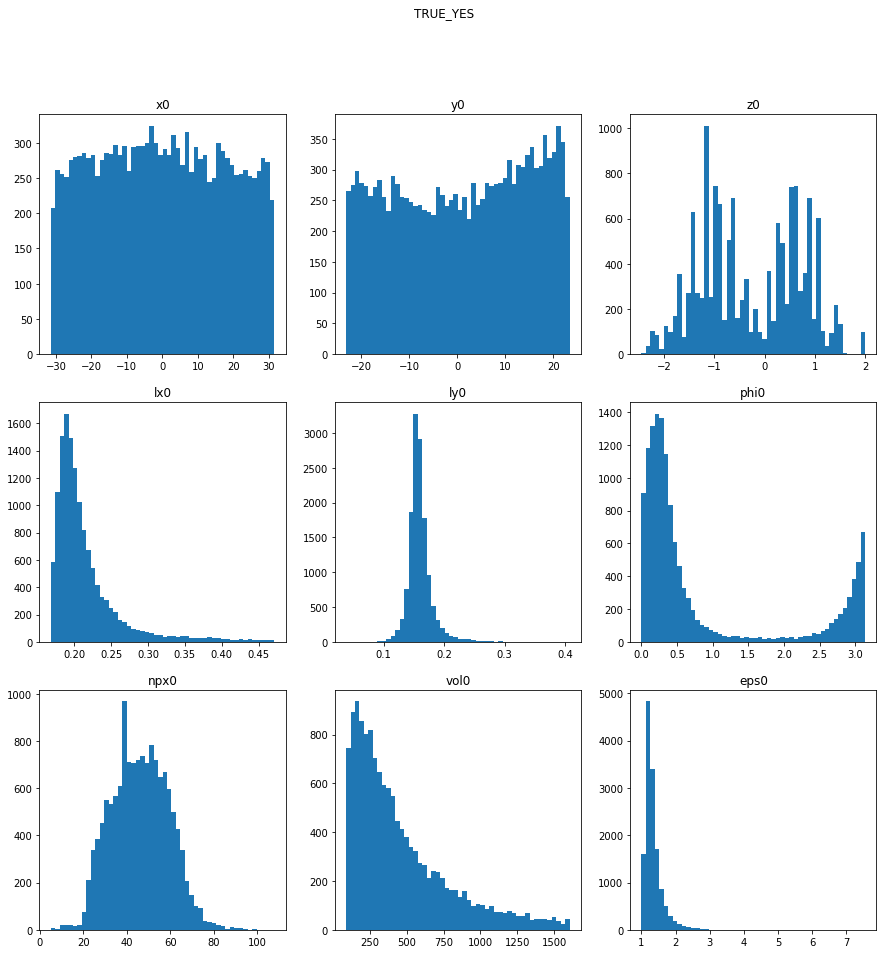

In [10]:
i = 0
fig, axes = plt.subplots(3, 3,figsize=(15, 15))
fig.suptitle('TRUE_YES')
axes = axes.ravel()
for n, name in enumerate(feat_names):
    axes[n].hist(clean_quantile_feat(ft_pos_yes,0.95,0.95,['lx'+str(i),'vol'+str(i)]).values[:,9*i+n], bins=50)
    axes[n].set_title(feat_names[n]+str(i))

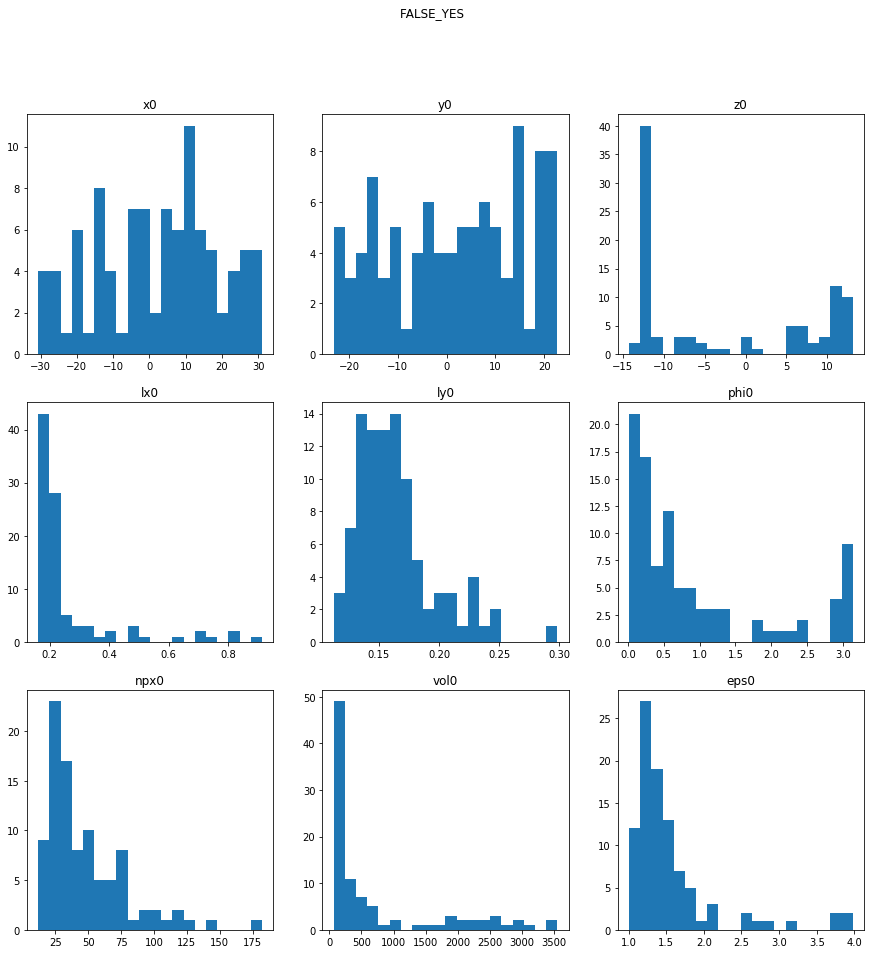

In [11]:
i = 0
fig, axes = plt.subplots(3, 3,figsize=(15, 15))
fig.suptitle('FALSE_YES')
axes = axes.ravel()
for n, name in enumerate(feat_names):
    axes[n].hist(clean_quantile_feat(ft_neg_yes,0.95,0.95,['lx'+str(i),'vol'+str(i)]).values[:,9*i+n], bins=20)
    axes[n].set_title(feat_names[n]+str(i))

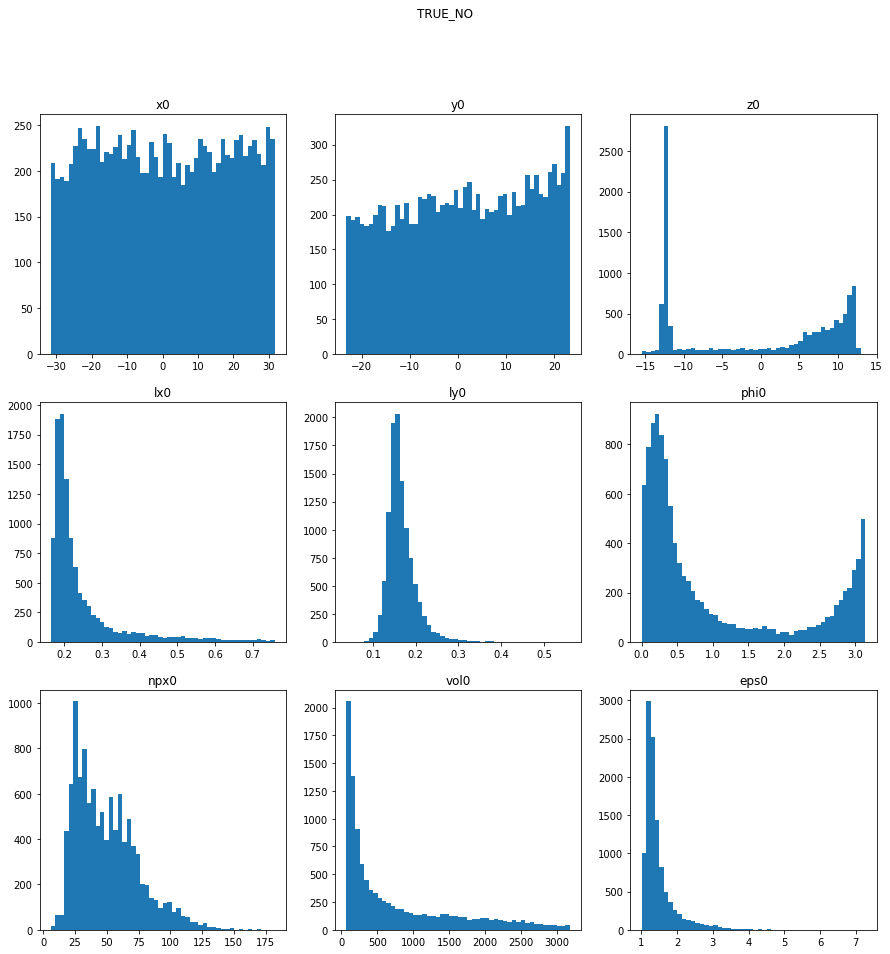

In [12]:
i = 0
feat_names = ['x','y','z','lx','ly','phi','npx','vol','eps']
fig, axes = plt.subplots(3, 3,figsize=(15, 15))
fig.suptitle('TRUE_NO')
axes = axes.ravel()
for n, name in enumerate(feat_names):
    axes[n].hist(clean_quantile_feat(ft_neg_no,0.95,0.95,['lx'+str(i),'vol'+str(i)]).values[:,9*i+n], bins=50)
    axes[n].set_title(feat_names[n]+str(i))

### C30keV Test

In [17]:
X_test, y_test, shuf_ind = load_data(sig_n='C30keV',training=False, images=True, feat_study=True)
ft_test, y_ft_test, shuf_ind_ft = load_data(sig_n='C30keV',training=False, images=False, feat_study=True, shuf_ind=shuf_ind)

X_test shape:	(36822, 32, 32, 8, 1)
y_test shape:	(36822,)
X_test shape:	(36822, 72)
y_test shape:	(36822,)


In [19]:
preds = model.predict(X_test,batch_size=128, verbose=1)
# 1st column = output, 2nd column = index
pos, neg = pos_neg(y_test, preds)

pos_yes = pos[pos[:,0]>0.999]
pos_no = pos[pos[:,0]<0.01]
print('certain_true_sig:\t', pos_yes.shape[0])
print('certain_false_bckg:\t', pos_no.shape[0])
neg_yes = neg[neg[:,0]>0.99]
neg_no = neg[neg[:,0]<0.001]
print('certain_false_sig:\t', neg_yes.shape[0])
print('certain_true_bckg:\t', neg_no.shape[0])

36822/36822 [==============================] - 52s    
certain_true_sig:	 16052
certain_false_bckg:	 1
certain_false_sig:	 120
certain_true_bckg:	 13434


In [20]:
X_pos_yes = X_test[np.array(pos_yes[:,1], dtype=np.int)]
X_neg_yes = X_test[np.array(neg_yes[:,1], dtype=np.int)]
X_neg_no = X_test[np.array(neg_no[:,1], dtype=np.int)]

### Some images where network is certain

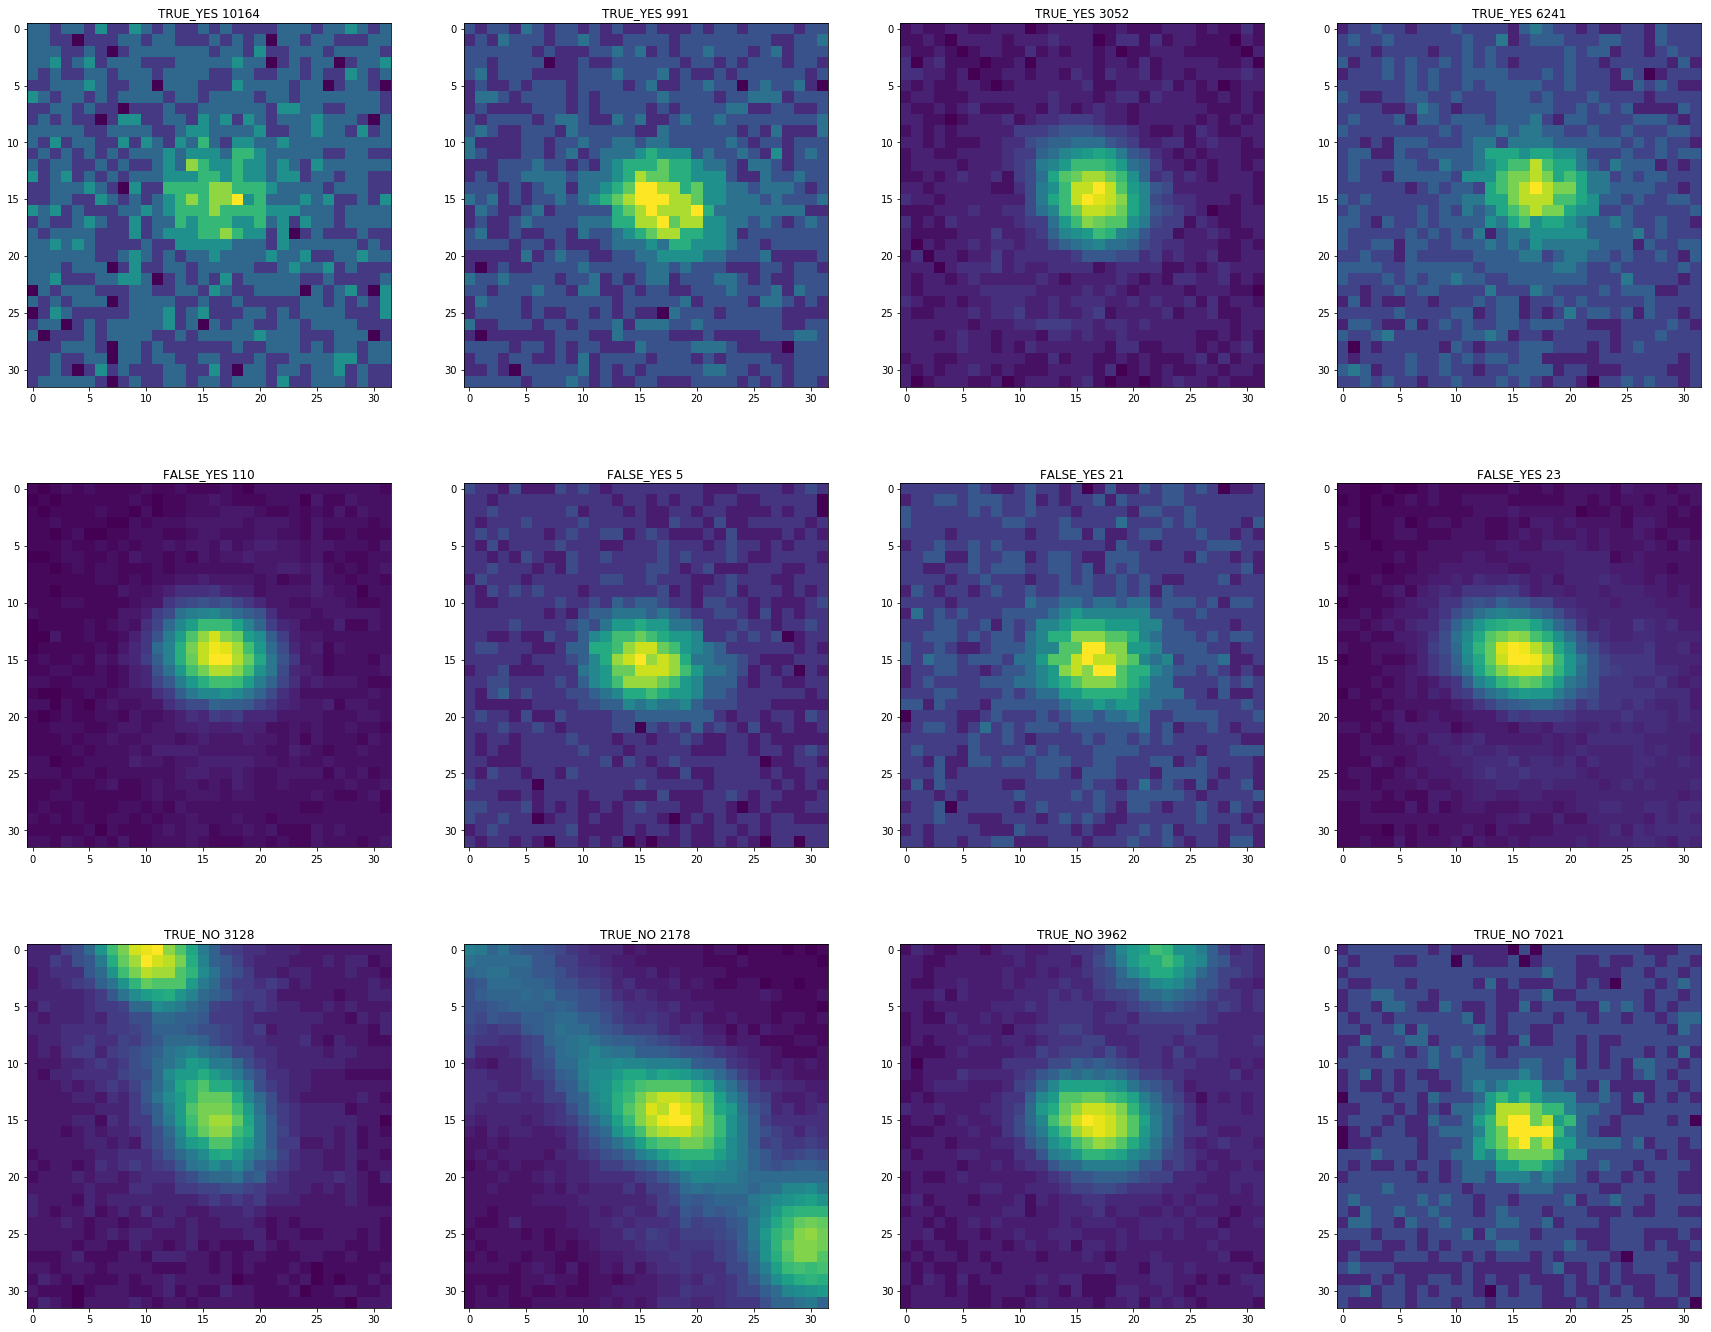

In [21]:
fig, axes = plt.subplots(3, 4,figsize=(30, 24))

for ind, ax in zip(np.random.randint(0,X_pos_yes.shape[0],4), axes.ravel()[:4]):
    ax.imshow(X_pos_yes[ind,...,3,0])
    ax.set_title('TRUE_YES '+str(ind))
for ind, ax in zip(np.random.randint(0,X_neg_yes.shape[0],4), axes.ravel()[4:8]):
    ax.imshow(X_neg_yes[ind,...,3,0])
    ax.set_title('FALSE_YES '+str(ind))
for ind, ax in zip(np.random.randint(0,X_neg_no.shape[0],4), axes.ravel()[8:]):
    ax.imshow(X_neg_no[ind,...,3,0])
    ax.set_title('TRUE_NO '+str(ind))
#plt.plot()

In [22]:
feat_names = ['x','y','z','lx','ly','phi','npx','vol','eps']
feat_array = []
for i in range(8):
    for name in feat_names:
        feat_array.append(name+str(i))

In [23]:
ft_pos_yes = pd.DataFrame(data=ft_test[np.array(pos_yes[:,1], dtype=np.int)],columns=feat_array).dropna()
ft_neg_yes = pd.DataFrame(data=ft_test[np.array(neg_yes[:,1], dtype=np.int)],columns=feat_array).dropna()
ft_neg_no = pd.DataFrame(data=ft_test[np.array(neg_no[:,1], dtype=np.int)],columns=feat_array).dropna()

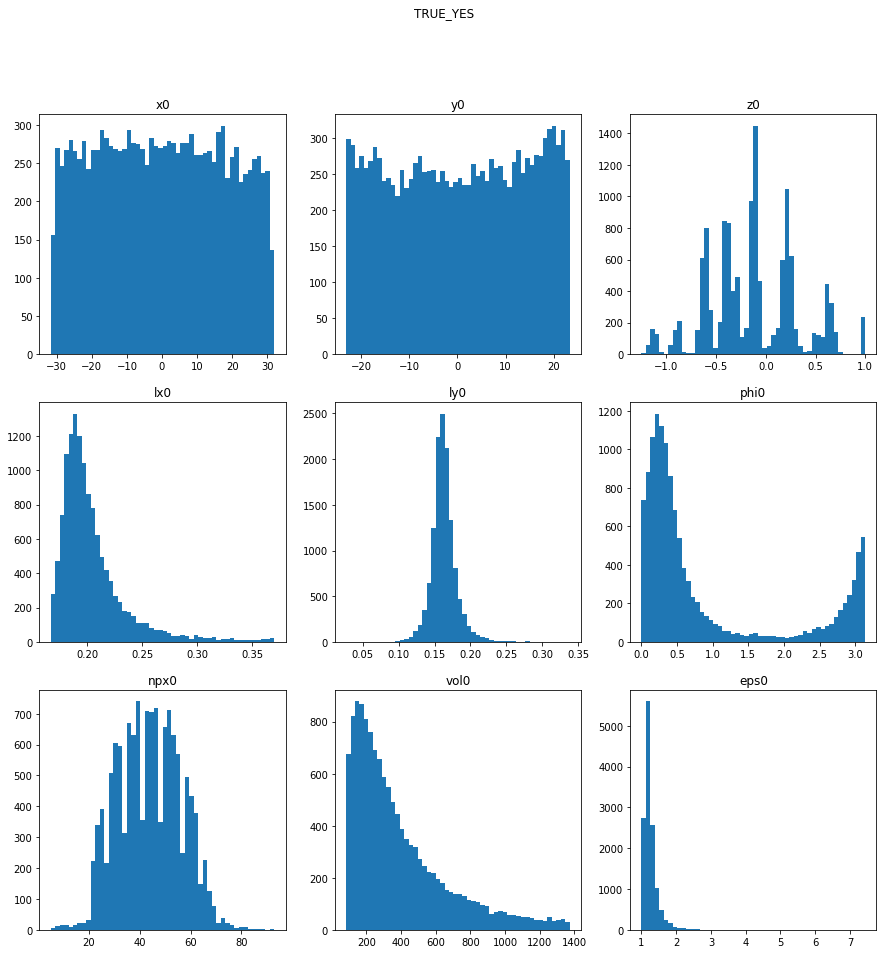

In [24]:
i = 0
fig, axes = plt.subplots(3, 3,figsize=(15, 15))
fig.suptitle('TRUE_YES')
axes = axes.ravel()
for n, name in enumerate(feat_names):
    axes[n].hist(clean_quantile_feat(ft_pos_yes,0.95,0.95,['lx'+str(i),'vol'+str(i)]).values[:,9*i+n], bins=50)
    axes[n].set_title(feat_names[n]+str(i))

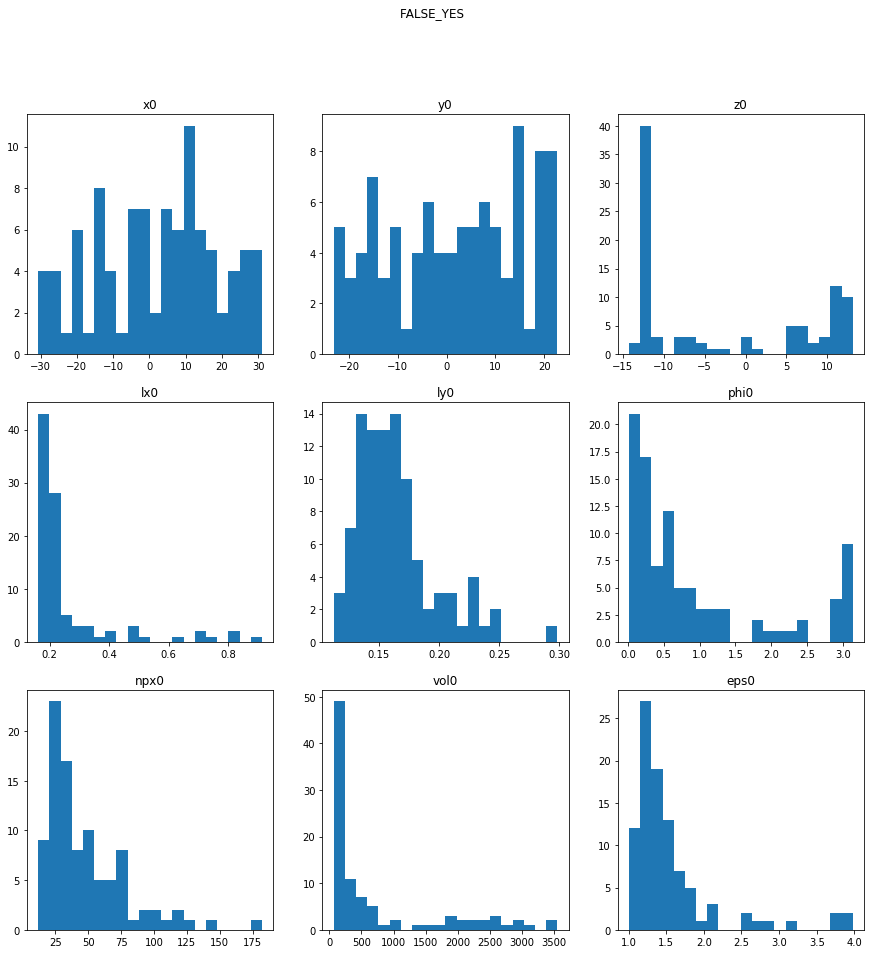

In [25]:
i = 0
fig, axes = plt.subplots(3, 3,figsize=(15, 15))
fig.suptitle('FALSE_YES')
axes = axes.ravel()
for n, name in enumerate(feat_names):
    axes[n].hist(clean_quantile_feat(ft_neg_yes,0.95,0.95,['lx'+str(i),'vol'+str(i)]).values[:,9*i+n], bins=20)
    axes[n].set_title(feat_names[n]+str(i))

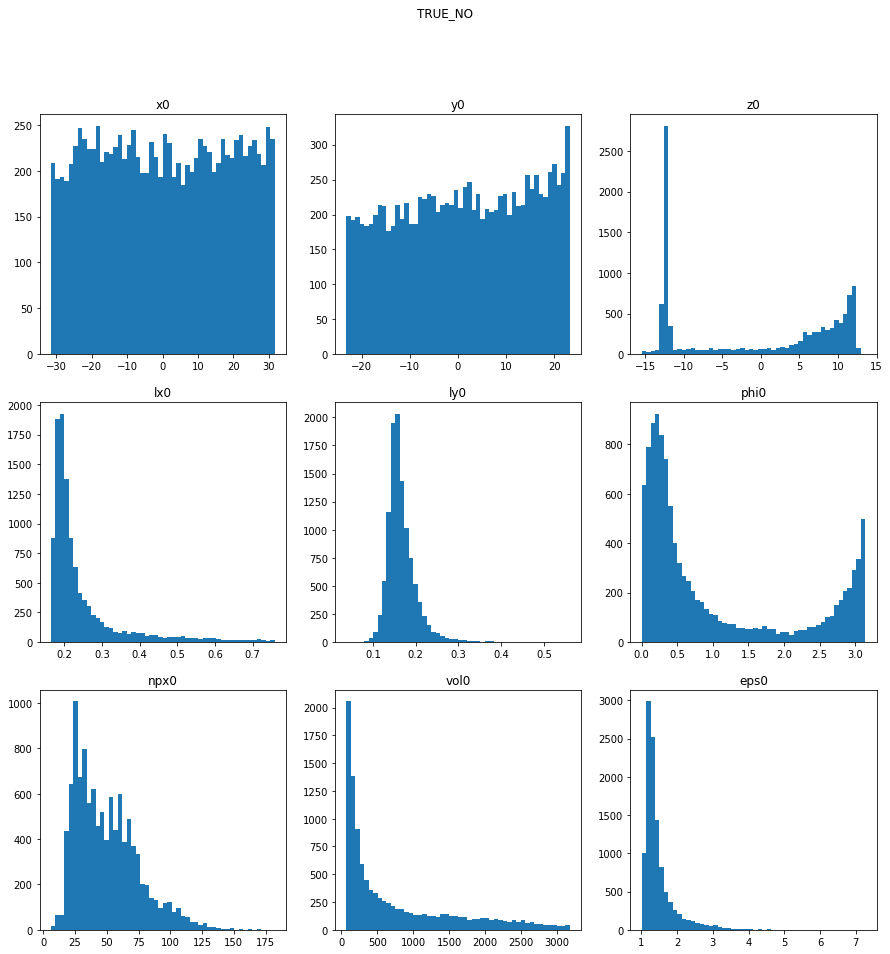

In [26]:
i = 0
feat_names = ['x','y','z','lx','ly','phi','npx','vol','eps']
fig, axes = plt.subplots(3, 3,figsize=(15, 15))
fig.suptitle('TRUE_NO')
axes = axes.ravel()
for n, name in enumerate(feat_names):
    axes[n].hist(clean_quantile_feat(ft_neg_no,0.95,0.95,['lx'+str(i),'vol'+str(i)]).values[:,9*i+n], bins=50)
    axes[n].set_title(feat_names[n]+str(i))